In [112]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from plotly.offline import iplot
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
%matplotlib inline
sns.set()

In [113]:
#Loading in da data
stock_price = pd.read_csv('1.3 stock.csv')

In [114]:
stock_volume = pd.read_csv('1.4 stock_volume.csv')

In [115]:
stock_price.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [116]:
stock_volume.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000


# Exploratory Data Analysis

In [117]:
stock_price = stock_price.sort_values(by='Date')
stock_volume = stock_volume.sort_values(by='Date')

In [118]:
stock_price.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [119]:
stock_volume.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [120]:
stock_price.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [121]:
stock_volume.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


In [122]:
#SP500 is the most traded security in terms of volume

In [124]:
#Creating a function to plot interactive plots

def interactive_plots(df, title):
    fig = px.line(title = title)
    
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
    plt.show()

# Normalizing the data

In [123]:
#Creating a function to normalize the data so that we are working within the same scale accross all stocks

def normalize(df):
    x = df.copy()
    
    for i in x.columns[1:]:
        x[i] = x[i] / x[i][0]
        
    return x

In [125]:
interactive_plots(stock_price, 'STOCK PRICES')

In [126]:
interactive_plots(stock_volume, 'STOCK VOLUME')

In [127]:
scaled_price = normalize(stock_price)

In [128]:
scaled_price

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


In [129]:
scaled_volume = normalize(stock_volume)

In [130]:
scaled_volume

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,1.063195,1.179591,0.833492,0.929054,0.882599,0.767214,7.542027,1.230422,0.918525
2,2012-01-17,1.142577,0.940424,0.886429,0.865279,1.048034,0.872460,6.378171,1.018170,0.997662
3,2012-01-18,1.302013,1.064811,0.830407,1.027751,1.387630,0.668595,1.727958,1.472745,1.018973
4,2012-01-19,1.231205,1.371788,0.962767,0.783792,1.317539,1.245052,1.708899,3.362501,1.110948
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.573845,11.831491,0.867248,1.057185,0.729697,0.534137,6.825723,0.525847,1.177201
2155,2020-08-06,0.952215,8.367416,0.826397,2.004779,0.731665,0.496599,8.216509,0.530071,1.061594
2156,2020-08-07,0.930504,4.905731,1.146633,1.930027,0.729622,0.530591,12.180858,0.418818,1.021137
2157,2020-08-10,0.999136,9.113661,1.339605,3.980733,0.588083,0.576704,10.314411,0.342498,1.074301


# Creating stock price and volume dataframes for individual securites

In [131]:
#Function to create a dataframe that consist of date, stock price and trading volume for individual stocks
def individual_stock(price, volume, name):
    return pd.DataFrame({'Date':stock_price['Date'], 'Close':stock_price[name], 'Volume':stock_volume[name]})

In [132]:
def target_window(data):
    n = 1
    data['Target'] = data[['Close']].shift(-n)
    return data

In [133]:
stock_data = individual_stock(stock_price, stock_volume, 'AAPL')

In [134]:
stock_data

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [135]:
input_data = target_window(stock_data)

In [136]:
input_data = input_data.dropna()

In [137]:
input_data.head()

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858


# Scaling the data

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
scaler = MinMaxScaler()

In [140]:
scaled_input = scaler.fit_transform(input_data.drop('Date', axis = 1))

In [141]:
scaled_input

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [142]:
x = scaled_input[:, :2]
y = scaled_input[:, 2:]

In [143]:
x

array([[0.01102638, 0.11442624],
       [0.01046185, 0.12362365],
       [0.01220906, 0.13517696],
       ...,
       [1.        , 0.10747163],
       [0.97208751, 0.10431171],
       [0.98824476, 0.11430054]])

In [144]:
y

array([[0.01046185],
       [0.01220906],
       [0.01378478],
       ...,
       [0.97208751],
       [0.98824476],
       [0.95470465]])

In [145]:
split = int(0.65 * len(x))

# Spliting the data into training and testing sets

In [147]:
x_train = x[:split]
y_train = y[:split]

In [148]:
x_test = x[split:]
y_test = y[split:]

In [149]:
x_train.shape

(1402, 2)

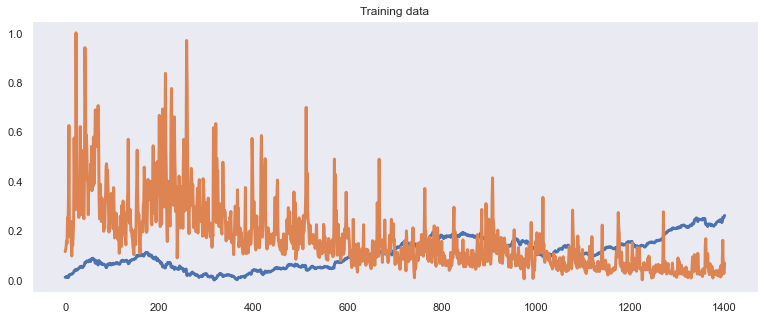

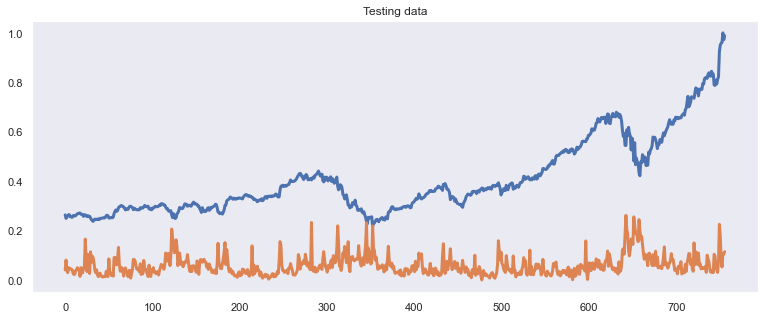

In [150]:
def show_plot(data, title):
    plt.figure(figsize = (13,5))
    plt.plot(data, linewidth=3)
    plt.title(title)
    plt.grid()
    
show_plot(x_train, 'Training data')
show_plot(x_test, 'Testing data')

In [151]:
sp500_stock = individual_stock(stock_price, stock_volume, 'sp500')

In [152]:
sp500_stock

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [153]:
sp500 = target_window(sp500_stock)

In [154]:
sp500

,Date,Close,Volume,Target
0,2012-01-12,1295.500000,4019890000,1289.089966
1,2012-01-13,1289.089966,3692370000,1293.670044
2,2012-01-17,1293.670044,4010490000,1308.040039
3,2012-01-18,1308.040039,4096160000,1314.500000
4,2012-01-19,1314.500000,4465890000,1315.380005
...,...,...,...,...
2154,2020-08-05,3327.770020,4732220000,3349.159912
2155,2020-08-06,3349.159912,4267490000,3351.280029
2156,2020-08-07,3351.280029,4104860000,3360.469971
2157,2020-08-10,3360.469971,4318570000,3333.689941


In [155]:
sp500_data = sp500.dropna()

In [156]:
sp500_data

,Date,Close,Volume,Target
0,2012-01-12,1295.500000,4019890000,1289.089966
1,2012-01-13,1289.089966,3692370000,1293.670044
2,2012-01-17,1293.670044,4010490000,1308.040039
3,2012-01-18,1308.040039,4096160000,1314.500000
4,2012-01-19,1314.500000,4465890000,1315.380005
...,...,...,...,...
2153,2020-08-04,3306.510010,4621670000,3327.770020
2154,2020-08-05,3327.770020,4732220000,3349.159912
2155,2020-08-06,3349.159912,4267490000,3351.280029
2156,2020-08-07,3351.280029,4104860000,3360.469971


In [157]:
scaled_sp = scaler.fit_transform(sp500_data.drop('Date', axis=1))

In [158]:
scaled_sp

array([[0.00828228, 0.35544202, 0.00524163],
       [0.00524163, 0.31342927, 0.00741423],
       [0.00741423, 0.35423623, 0.01423076],
       ...,
       [0.98245348, 0.38720299, 0.98345918],
       [0.98345918, 0.36634157, 0.9878185 ],
       [0.9878185 , 0.3937553 , 0.97511517]])

In [159]:
x_sp = scaled_sp[:, :2]
y_sp = scaled_sp[:, 2:]

In [160]:
x_train_sp = x_sp[:split]
y_train_sp = y_sp[:split]

In [161]:
x_test_sp = x_sp[split:]
y_test_sp = y_sp[split:]

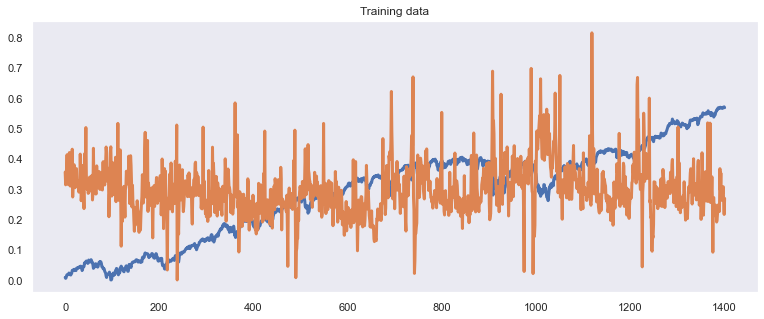

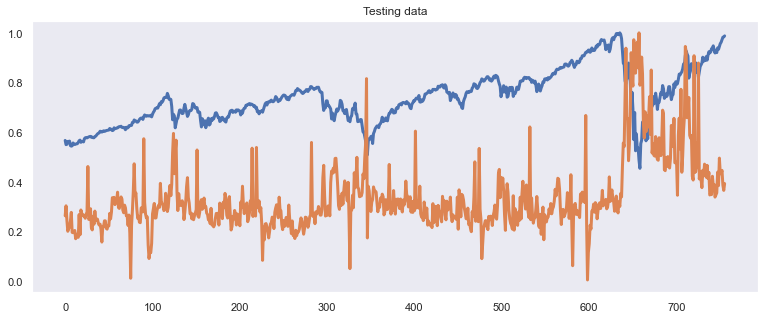

In [162]:
show_plot(x_train_sp, 'Training data')
show_plot(x_test_sp, 'Testing data')

In [163]:
AMZN_stock = individual_stock(stock_price, stock_volume, 'AMZN')

In [164]:
AMZN_data = target_window(AMZN_stock)

In [165]:
AMZN_data

,Date,Close,Volume,Target
0,2012-01-12,175.929993,5385800,178.419998
1,2012-01-13,178.419998,4753500,181.660004
2,2012-01-17,181.660004,5644500,189.440002
3,2012-01-18,189.440002,7473500,194.449997
4,2012-01-19,194.449997,7096000,190.929993
...,...,...,...,...
2154,2020-08-05,3205.030029,3930000,3225.000000
2155,2020-08-06,3225.000000,3940600,3167.459961
2156,2020-08-07,3167.459961,3929600,3148.159912
2157,2020-08-10,3148.159912,3167300,3080.669922


In [166]:
AMZN_data = AMZN_data.dropna()

In [167]:
AMZN_scaled = scaler.fit_transform(AMZN_data.drop('Date', axis=1))

In [168]:
AMZN_scaled

array([[0.00000000e+00, 1.96062643e-01, 0.00000000e+00],
       [8.16644090e-04, 1.68541184e-01, 1.06348955e-03],
       [1.87926515e-03, 2.07322806e-01, 3.61717204e-03],
       ...,
       [1.00000000e+00, 1.33158939e-01, 9.81113236e-01],
       [9.81128659e-01, 1.32680154e-01, 9.74778247e-01],
       [9.74798844e-01, 9.95003221e-02, 9.52625541e-01]])

In [169]:
x_AZ = AMZN_scaled[:, :2]
y_AZ = AMZN_scaled[:, 2:]

In [170]:
x_train_AZ = x_AZ[:split]
y_train_AZ = y_AZ[:split]

In [171]:
x_test_AZ = x_AZ[split:]
y_test_AZ = y_AZ[split:]

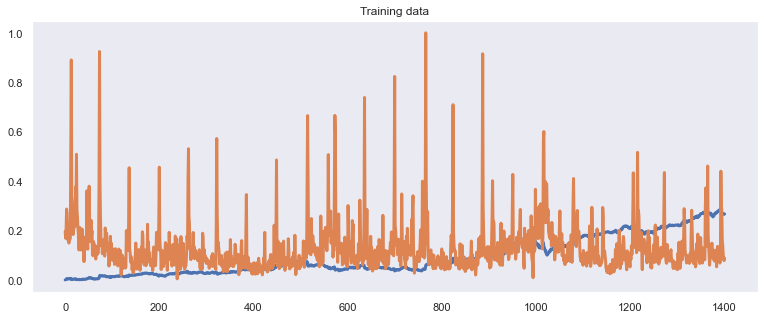

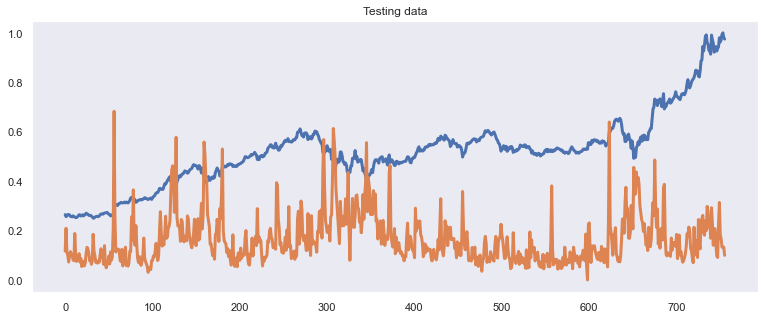

In [172]:
show_plot(x_train_AZ, 'Training data')
show_plot(x_test_AZ, 'Testing data')

# Building and training the model

In [173]:
from sklearn.linear_model import Ridge

In [174]:
log = Ridge(alpha= 0.1)

In [175]:
log.fit(x_train_AZ, y_train_AZ)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# Accuracy_score

In [176]:
accuracy= log.score(x_test_AZ, y_test_AZ)

In [177]:
accuracy

0.9913809325120825

In [178]:
y_pred = log.predict(x_AZ)

In [179]:
predicted = []

for i in y_pred:
    predicted.append(i[0])

In [180]:
len(predicted)

2158

In [181]:
close = []

for i in AMZN_scaled:
    close.append(i[0])

In [182]:
df_predicted = AMZN_data['Date']

In [183]:
df_predicted = pd.DataFrame(df_predicted, columns=['Date'])

In [184]:
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [185]:
df_predicted['Close'] = close

In [186]:
df_predicted

,Date,Close
0,2012-01-12,0.000000
1,2012-01-13,0.000817
2,2012-01-17,0.001879
3,2012-01-18,0.004431
4,2012-01-19,0.006074
...,...,...
2153,2020-08-04,0.971739
2154,2020-08-05,0.993450
2155,2020-08-06,1.000000
2156,2020-08-07,0.981129


In [187]:
df_predicted['Predictions'] = predicted 

In [188]:
df_predicted

,Date,Close,Predictions
0,2012-01-12,0.000000,0.000370
1,2012-01-13,0.000817,0.001206
2,2012-01-17,0.001879,0.002219
3,2012-01-18,0.004431,0.004665
4,2012-01-19,0.006074,0.006307
...,...,...,...
2153,2020-08-04,0.971739,0.961878
2154,2020-08-05,0.993450,0.983393
2155,2020-08-06,1.000000,0.989873
2156,2020-08-07,0.981129,0.971201


In [190]:
interactive_plots(df_predicted, 'Original vs Predictions')